# <h1><center>**`Chronic Kidney Disease Problem`**</center></h1>

![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

**Problem Statement:**

According to National Library of Medicine 9 out of 10 people don't even know that they are suffering from Early Chronic Kidney Disease (CKD).

There can be a lot of reasons for this for example that the person is not getting frequent checkup's due to lack of awareness or the people are not having quick and low-cost access to modern digital solution.

To build a ML model based on data points corresponds to kidney diseases to predict whether the patient is having early CKD or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chronic_df = pd.read_csv('/content/kidney_disease.csv')
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	

In [3]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [4]:
chronic_df = chronic_df.drop(['id'], axis=1)

In [5]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
chronic_df[['specific_gravity', 'albumin', 'sugar']]=chronic_df[['specific_gravity', 'albumin', 'sugar']].astype('object')

In [8]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
chronic_df['packed_cell_volume'] =pd.to_numeric(chronic_df['packed_cell_volume'], errors='coerce')
chronic_df['white_blood_cell_count'] =pd.to_numeric(chronic_df['white_blood_cell_count'], errors='coerce')
chronic_df['red_blood_cell_count'] =pd.to_numeric(chronic_df['red_blood_cell_count'], errors='coerce')

In [9]:
cat_cols = []
num_cols = []

for c in chronic_df.columns:
  if chronic_df[c].dtype=='object':
    cat_cols +=[c]
  else:
    num_cols +=[c]

print(cat_cols)
print(num_cols)

['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [10]:
for col in cat_cols: 
  print (f" {col} has {chronic_df[col].unique()} values\n")

 specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

 albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

 sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

 red_blood_cells has [nan 'normal' 'abnormal'] values

 pus_cell has ['normal' 'abnormal' nan] values

 pus_cell_clumps has ['notpresent' 'present' nan] values

 bacteria has ['notpresent' 'present' nan] values

 hypertension has ['yes' 'no' nan] values

 diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

 coronary_artery_disease has ['no' 'yes' '\tno' nan] values

 appetite has ['good' 'poor' nan] values

 peda_edema has ['no' 'yes' nan] values

 aanemia has ['no' 'yes' nan] values

 class has ['ckd' 'ckd\t' 'notckd'] values



In [11]:
chronic_df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no', '\tyes':'yes'}, inplace=True)# replace incorrect values
chronic_df['coronary_artery_disease'].replace({'\tno':'no'}, inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'}, inplace=True)

In [12]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class'] = chronic_df['class'].map({'ckd':0, 'notckd':1})
chronic_df['class'] =pd.to_numeric(chronic_df['class'], errors='coerce')

In [13]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [14]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

<Figure size 1440x864 with 0 Axes>

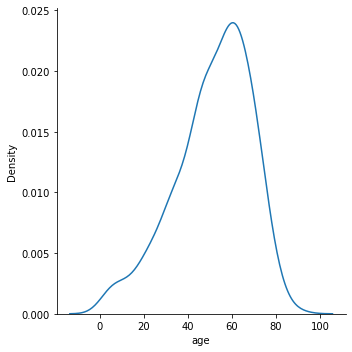

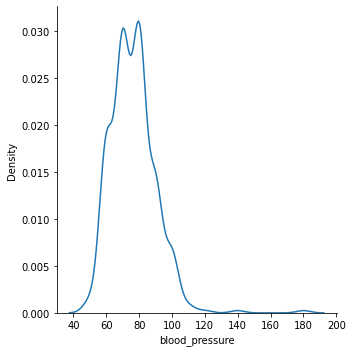

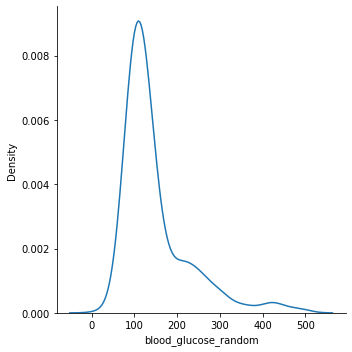

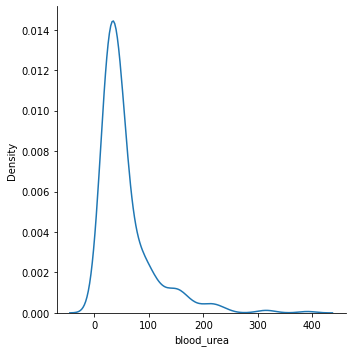

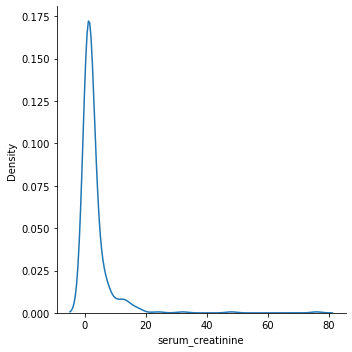

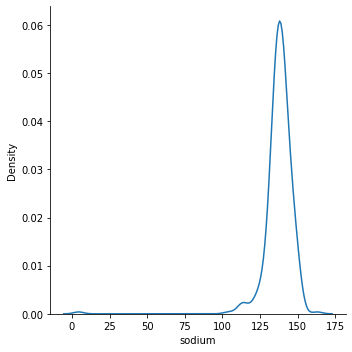

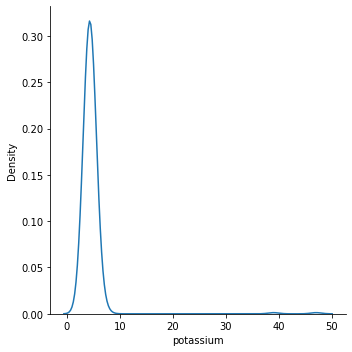

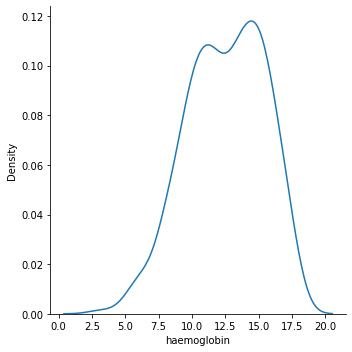

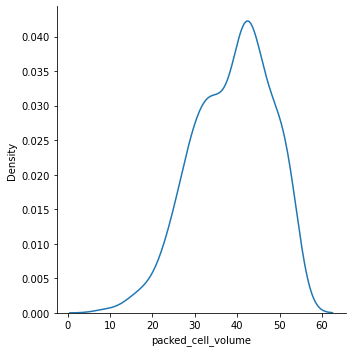

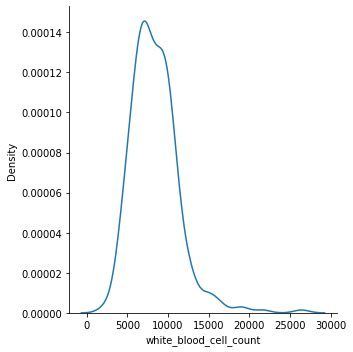

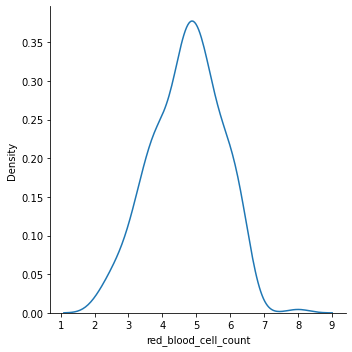

In [15]:
plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
  sns.displot(chronic_df[col],kind='kde')

In [16]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

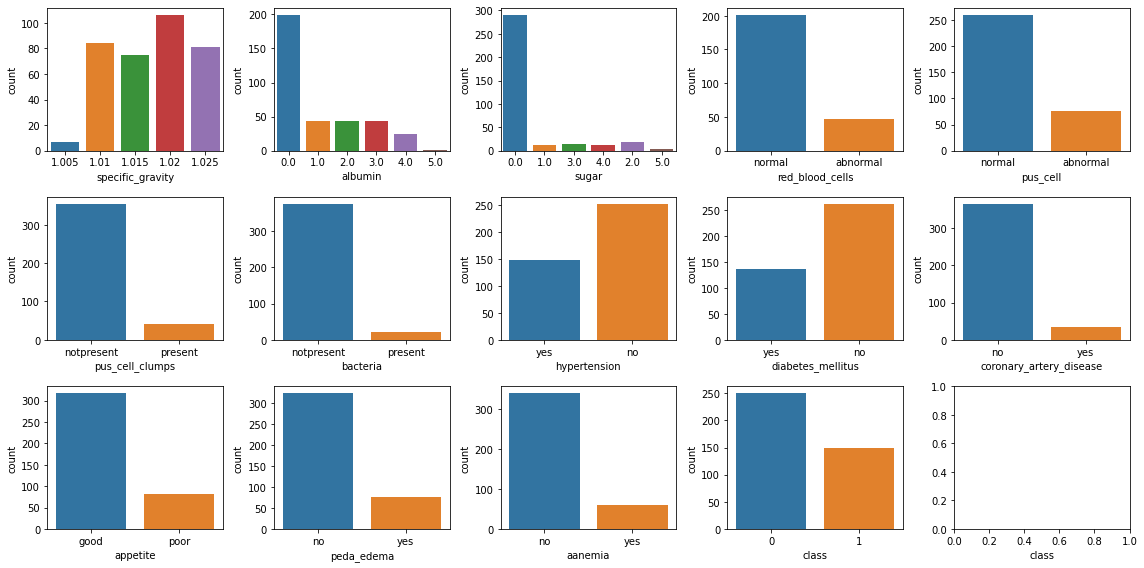

In [17]:
# checking cat features distribution
fig, axes = plt.subplots(3, 5, figsize=(16,8))
axes = axes.ravel()  # flattening the array makes indexing easier

for col,ax in zip(cat_cols,axes):
  sns.countplot(chronic_df[col],ax=ax)
  plt.xlabel(col)
  fig.tight_layout()


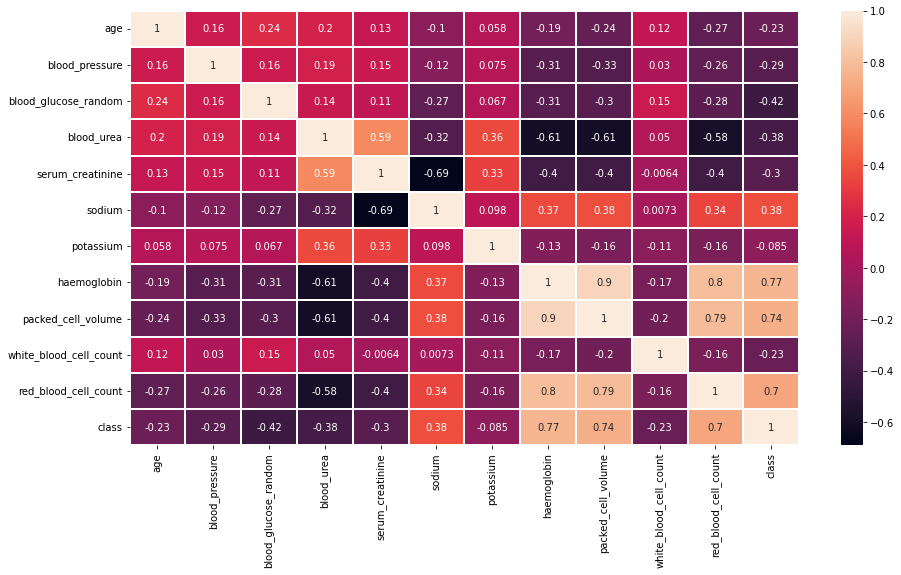

In [18]:
plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(),annot=True, linewidth=2)
plt.show()

In [19]:
chronic_df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [20]:
chronic_df[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [21]:
chronic_df[cat_cols].isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [22]:
# filling null values,random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isnull().sum())
    random_sample.index =chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample
    
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [23]:
for col in num_cols:
  random_value_imputation(col)

In [24]:
chronic_df[num_cols].isnull().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [25]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation("red_blood_cells" )
random_value_imputation("pus_cell")

for col in cat_cols:
  impute_mode(col)

In [26]:
chronic_df[cat_cols].isnull().sum().sort_values(ascending=False)

specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [27]:
for col in cat_cols: 
  print (f" {col} has {chronic_df[col].nunique()}categories\n")

 specific_gravity has 5categories

 albumin has 6categories

 sugar has 6categories

 red_blood_cells has 2categories

 pus_cell has 2categories

 pus_cell_clumps has 2categories

 bacteria has 2categories

 hypertension has 2categories

 diabetes_mellitus has 2categories

 coronary_artery_disease has 2categories

 appetite has 2categories

 peda_edema has 2categories

 aanemia has 2categories

 class has 2categories



In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] = le.fit_transform(chronic_df[col])

In [29]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,234.0,...,38.0,6000.0,4.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,6.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [30]:
X = chronic_df.drop('class', axis=1)
y = chronic_df['class']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

## **`Model Building`**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc =accuracy_score (y_test, knn.predict(X_test))
print(f" Training Accuracy of KNN is {accuracy_score (y_train, knn.predict(X_train))}") 
print(f"Test Accuracy of KNN is {knn_acc}\n")
print (f"Confusion Matrix :-\n{confusion_matrix(y_test, knn.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

 Training Accuracy of KNN is 0.7642857142857142
Test Accuracy of KNN is 0.6666666666666666

Confusion Matrix :-
[[48 24]
 [16 32]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        72
           1       0.57      0.67      0.62        48

    accuracy                           0.67       120
   macro avg       0.66      0.67      0.66       120
weighted avg       0.68      0.67      0.67       120



In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc =accuracy_score (y_test, dtc.predict(X_test))
print(f" Training Accuracy of DTC is {accuracy_score (y_train, dtc.predict(X_train))}") 
print(f"Test Accuracy of DTC is {dtc_acc}\n")
print (f"Confusion Matrix :-\n{confusion_matrix(y_test, dtc.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

 Training Accuracy of DTC is 1.0
Test Accuracy of DTC is 0.9666666666666667

Confusion Matrix :-
[[70  2]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.96      0.96      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [34]:
# hyper parameter tuning of decision tree
from sklearn.model_selection import GridSearchCV

grid_param =  {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc,grid_param ,cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [35]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'}
0.9821428571428571


In [36]:
# storing best estimator
dtc = grid_search_dtc.best_estimator_

dtc_acc =accuracy_score (y_test, dtc.predict(X_test))
print(f" Training Accuracy of DTC is {accuracy_score (y_train, dtc.predict(X_train))}") 
print(f"Test Accuracy of DTC is {dtc_acc}\n")
print (f"Confusion Matrix :-\n{confusion_matrix(y_test, dtc.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

 Training Accuracy of DTC is 0.9928571428571429
Test Accuracy of DTC is 0.9916666666666667

Confusion Matrix :-
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [38]:
from sklearn.ensemble import RandomForestClassifier

rd_clf =  RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto', min_samples_leaf= 2, min_samples_split= 3,n_estimators=130)
rd_clf.fit(X_train, y_train)

rd_clf_acc = rd_clf_acc =accuracy_score (y_test, rd_clf.predict(X_test))
print(f" Training Accuracy of RD_CLF is {accuracy_score (y_train, rd_clf.predict(X_train))}") 
print(f"Test Accuracy of RD_CLF  is {rd_clf_acc}\n")
print (f"Confusion Matrix :-\n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


 Training Accuracy of RD_CLF is 1.0
Test Accuracy of RD_CLF  is 0.9916666666666667

Confusion Matrix :-
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_train, y_train)

ada_acc = accuracy_score (y_test, ada.predict(X_test))
print(f" Training Accuracy of ABC is {accuracy_score (y_train, ada.predict(X_train))}") 
print(f"Test Accuracy of ABC is {ada_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test, ada.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


 Training Accuracy of ABC is 1.0
Test Accuracy of ABC is 1.0

Confusion Matrix :-
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc =accuracy_score(y_test, gb.predict(X_test))
print(f" Training Accuracy of GBC is {accuracy_score(y_train, gb.predict(X_train))}") 
print(f"Test Accuracy of GBC is {gb_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test,gb.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

 Training Accuracy of GBC is 1.0
Test Accuracy of GBC is 1.0

Confusion Matrix :-
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [58]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

sgb_acc =accuracy_score(y_test, sgb.predict(X_test))
print(f" Training Accuracy of SGB is {accuracy_score(y_train, sgb.predict(X_train))}") 
print(f"Test Accuracy of SGB is {sgb_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test, sgb.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

 Training Accuracy of SGB is 1.0
Test Accuracy of SGB is 0.9916666666666667

Confusion Matrix :-
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

xgb_acc =accuracy_score(y_test, xgb.predict(X_test))
print(f" Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}") 
print(f"Test Accuracy of XGB is {xgb_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test,xgb.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

 Training Accuracy of XGB is 1.0
Test Accuracy of XGB is 0.9833333333333333

Confusion Matrix :-
[[71  1]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [49]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(10)
cat.fit(X_train, y_train)
cat_acc =accuracy_score(y_test, cat.predict(X_test))
print(f" Training Accuracy of CAT is {accuracy_score(y_train, cat.predict(X_train))}") 
print(f"Test Accuracy of CAT  is {cat_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test,cat.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Learning rate set to 0.408198
0:	learn: 0.3343362	total: 49.1ms	remaining: 442ms
1:	learn: 0.1890978	total: 51.3ms	remaining: 205ms
2:	learn: 0.1048013	total: 53.4ms	remaining: 125ms
3:	learn: 0.0715484	total: 55.3ms	remaining: 83ms
4:	learn: 0.0522547	total: 57.4ms	remaining: 57.4ms
5:	learn: 0.0449306	total: 59.4ms	remaining: 39.6ms
6:	learn: 0.0358850	total: 61.2ms	remaining: 26.2ms
7:	learn: 0.0296461	total: 63.2ms	remaining: 15.8ms
8:	learn: 0.0235587	total: 65.1ms	remaining: 7.23ms
9:	learn: 0.0198291	total: 67ms	remaining: 0us
 Training Accuracy of CAT is 1.0
Test Accuracy of CAT  is 0.9916666666666667

Confusion Matrix :-
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
etc =  ExtraTreesClassifier()
etc.fit(X_train, y_train)
etc_acc =accuracy_score(y_test, etc.predict(X_test))
print(f" Training Accuracy of ETC is {accuracy_score(y_train, etc.predict(X_train))}") 
print(f"Test Accuracy of ETC  is {etc_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test,etc.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

 Training Accuracy of ETC is 1.0
Test Accuracy of ETC  is 1.0

Confusion Matrix :-
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [52]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_acc =accuracy_score(y_test, lgbm.predict(X_test))
print(f" Training Accuracy of LGBM is {accuracy_score(y_train, lgbm.predict(X_train))}") 
print(f"Test Accuracy of LGBM  is {lgbm_acc}\n")
print(f"Confusion Matrix :-\n{confusion_matrix(y_test,lgbm.predict(X_test))}\n") 
print(f"Classification Report :- \n {classification_report(y_test, lgbm.predict(X_test))}")

 Training Accuracy of LGBM is 1.0
Test Accuracy of LGBM  is 0.9916666666666667

Confusion Matrix :-
[[71  1]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [63]:
models = pd.DataFrame({
"Model": [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 
'Stochastic Gradient Boosting', 'xgBoost', 'Cat Boost', 'Extra Trees Classifier'], 
"Score": [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
2,Random Forest Classifier,1.000000
3,Ada Boost Classifier,1.000000
8,Extra Trees Classifier,1.000000
1,Decision Tree Classifier,0.991667
5,Stochastic Gradient Boosting,0.991667
7,Cat Boost,0.991667
4,Gradient Boosting Classifier,0.983333
6,xgBoost,0.983333
0,KNN,0.666667
